In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from scipy.stats import pearsonr
from sklearn.feature_selection import r_regression

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/hallederiz kadirin projeleri/iBeacon_RSSI_Labeled.csv")

In [ ]:
data.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [ ]:
data.tail()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
1415,I01,4-19-2016 9:37:46,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,I01,4-19-2016 9:37:39,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,I01,4-19-2016 9:37:36,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,I01,4-19-2016 9:37:26,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1419,I01,4-19-2016 9:37:23,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  1420 non-null   object
 1   date      1420 non-null   object
 2   b3001     1420 non-null   int64 
 3   b3002     1420 non-null   int64 
 4   b3003     1420 non-null   int64 
 5   b3004     1420 non-null   int64 
 6   b3005     1420 non-null   int64 
 7   b3006     1420 non-null   int64 
 8   b3007     1420 non-null   int64 
 9   b3008     1420 non-null   int64 
 10  b3009     1420 non-null   int64 
 11  b3010     1420 non-null   int64 
 12  b3011     1420 non-null   int64 
 13  b3012     1420 non-null   int64 
 14  b3013     1420 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 166.5+ KB


In [ ]:
data["date"] = pd.to_datetime(data["date"])

In [ ]:
sorted = data.sort_values(by="date", ascending=True)

In [ ]:
sorted.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
1419,I01,2016-04-19 09:37:23,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,I01,2016-04-19 09:37:26,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,I01,2016-04-19 09:37:36,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,I01,2016-04-19 09:37:39,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1415,I01,2016-04-19 09:37:46,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [ ]:
print("unique date: ", data["date"].nunique())
print("sample size: ", len(data))

unique date:  1420
sample size:  1420


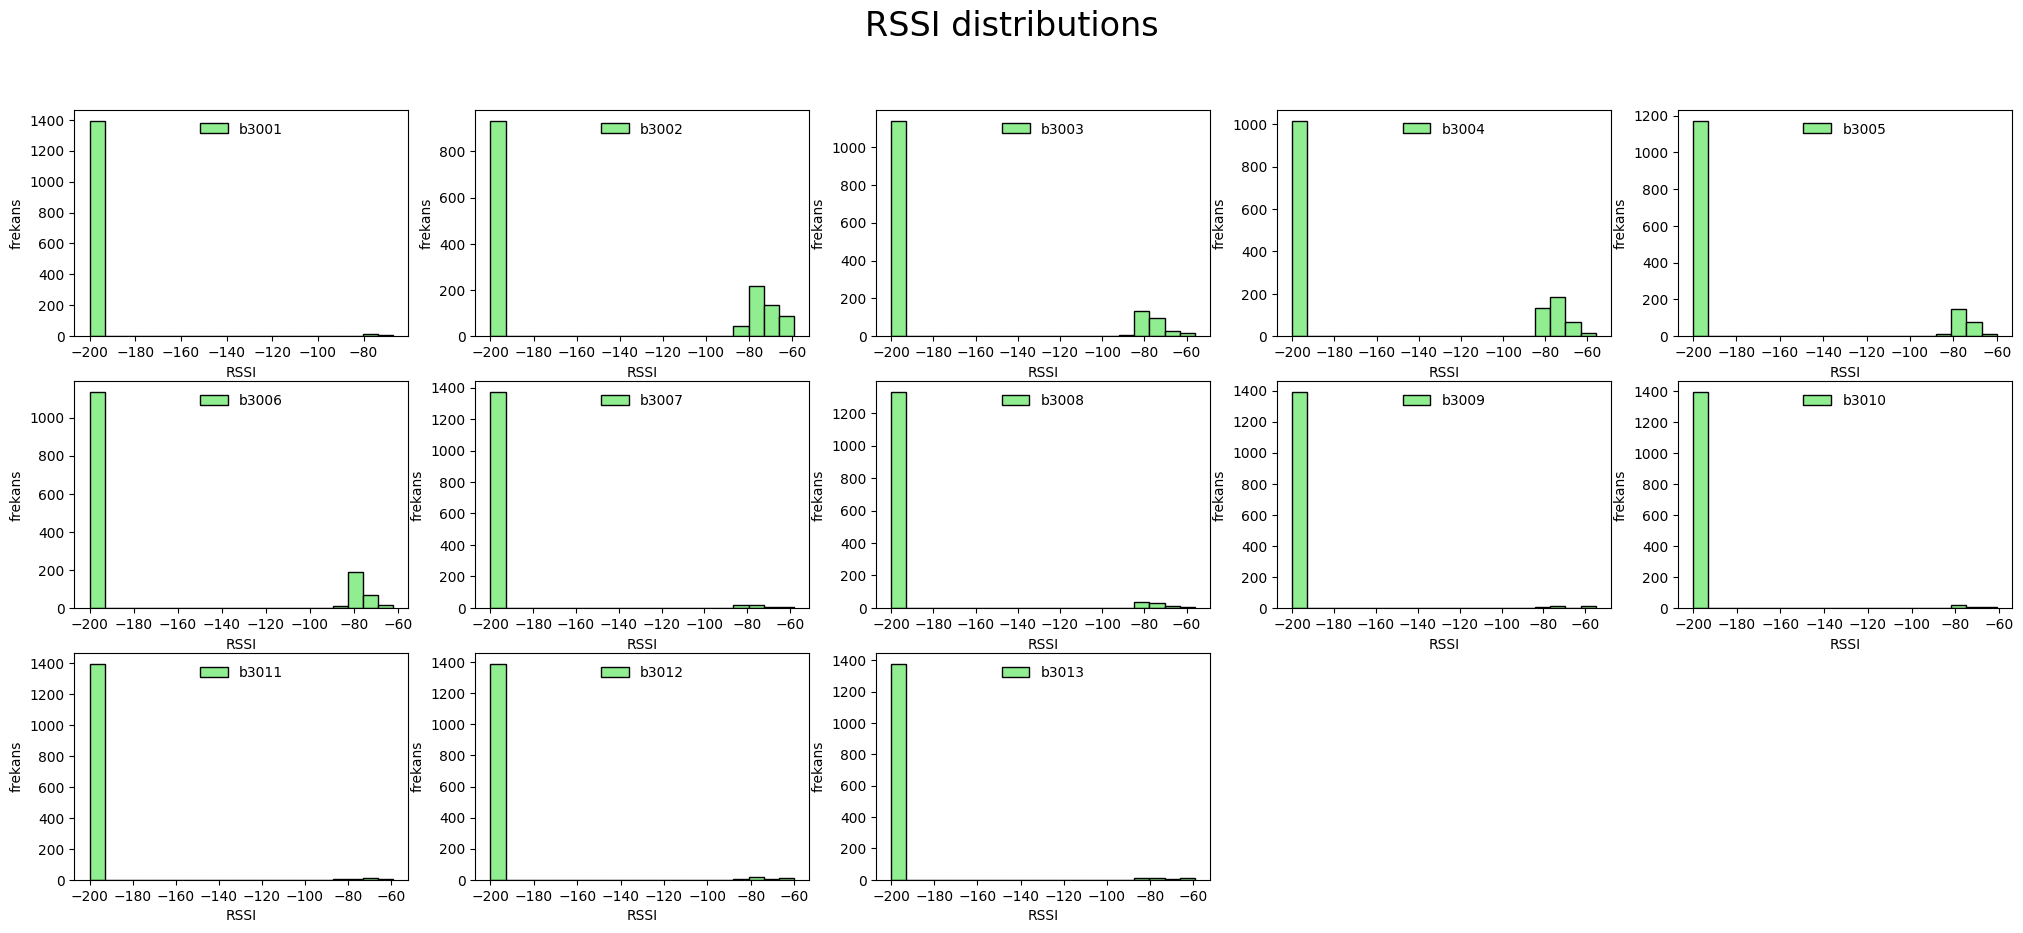

In [ ]:
#@title
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 10))
fig.suptitle("RSSI distributions", fontsize=24)

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(3):
    for j in range(5):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(data.columns.drop(["location", "date"])):

            ax.hist(data[data.columns.drop(["location", "date"])[counter]], bins=20, color='lightgreen', ec='black', label='{}'.format(data.columns.drop(["location", "date"])[counter]))
            ax.set_xlabel('RSSI')
            ax.set_ylabel('frekans')
            leg = ax.legend(loc='upper center')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

In [ ]:
data["location"].nunique()

105

In [ ]:
data["location"].unique()

array(['O02', 'P01', 'P02', 'R01', 'R02', 'S01', 'S02', 'T01', 'U02',
       'U01', 'J03', 'K03', 'L03', 'M03', 'N03', 'O03', 'P03', 'Q03',
       'R03', 'S03', 'T03', 'U03', 'U04', 'T04', 'S04', 'R04', 'Q04',
       'P04', 'O04', 'N04', 'M04', 'L04', 'K04', 'J04', 'I04', 'I05',
       'J05', 'K05', 'L05', 'M05', 'N05', 'O05', 'P05', 'Q05', 'R05',
       'S05', 'T05', 'U05', 'S06', 'R06', 'Q06', 'P06', 'O06', 'N06',
       'M06', 'L06', 'K06', 'J06', 'I06', 'F08', 'J02', 'J07', 'I07',
       'I10', 'J10', 'D15', 'E15', 'G15', 'J15', 'L15', 'R15', 'T15',
       'W15', 'I08', 'I03', 'J08', 'I01', 'I02', 'J01', 'K01', 'K02',
       'L01', 'L02', 'M01', 'M02', 'N01', 'N02', 'O01', 'I09', 'D14',
       'D13', 'K07', 'K08', 'N15', 'P15', 'I15', 'S15', 'U15', 'V15',
       'S07', 'S08', 'L09', 'L08', 'Q02', 'Q01'], dtype=object)

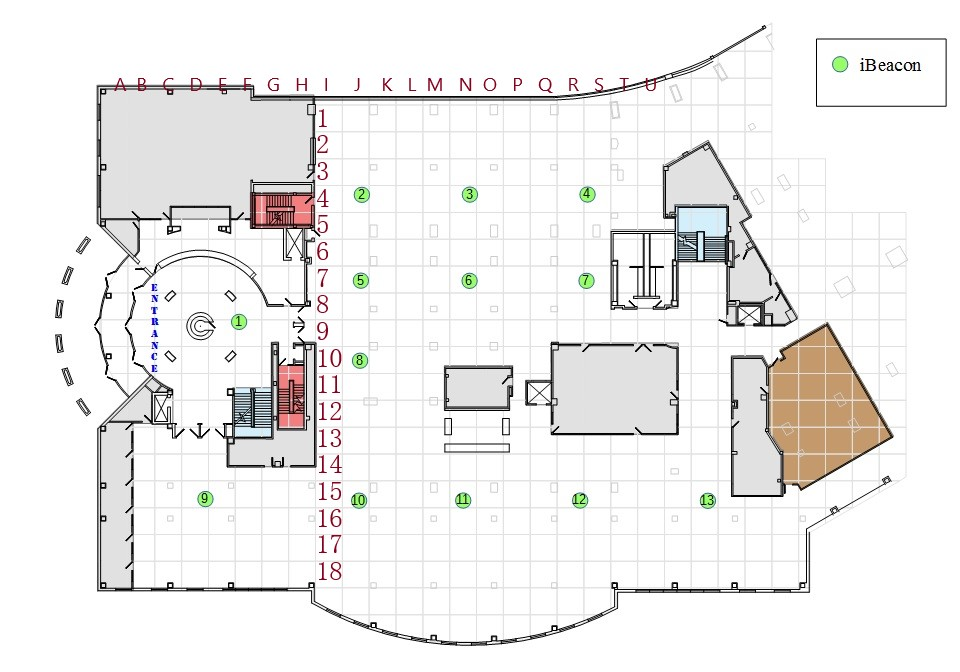

In [ ]:
x_coor = []
y_coor = sorted["location"].str[1:].astype("int").values

In [ ]:
import string

map = dict(enumerate(string.ascii_uppercase))
letters2numbers = {v: k for k, v in map.items()}

In [ ]:
letters2numbers

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [ ]:
for i in sorted["location"].str[0].values:

    table = i.maketrans(letters2numbers)
    x_coor.append(ord(i.translate(table)))

In [ ]:
sorted["x_coor"] = x_coor
sorted["y_coor"] = y_coor

In [ ]:
df = sorted.drop(["location", "date"], axis=1)

In [ ]:
y = df.iloc[:, -2:]

In [ ]:
X = df.drop(["x_coor", "y_coor"], axis=1)

In [ ]:
scaler_y = MinMaxScaler()
scaled_y = scaler_y.fit_transform(y)

scaler_X = MinMaxScaler()
scaled_X = scaler_X.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size = 0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.10, shuffle=False)

In [ ]:
def rnn(x, y, val_x, val_y):

    model = Sequential()
    model.add(SimpleRNN(units = 64, activation="tanh", 
                            return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.3))
    model.add(SimpleRNN(units = 64, activation="tanh", 
                            return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units = 32, activation="tanh", 
                            return_sequences=True))
    model.add(Dropout(0.1))
    model.add(SimpleRNN(units = 32))
    model.add(Dropout(0.1))             
    model.add(Dense(units=2))            

    model.compile(optimizer="adam", loss="mean_squared_error")
    model.summary()

    model.fit(x, y, epochs=100, batch_size=32, validation_data=(val_x, val_y))

    return model

In [ ]:
model_rnn = rnn(X_train, y_train, X_val, y_val)

In [ ]:
pred_rnn_without_scaling_train = model_rnn.predict(X_train)
pred_rnn_without_scaling_val = model_rnn.predict(X_val)
pred_rnn_without_scaling_test = model_rnn.predict(X_test)

7/7 [==============================] - 0s 5ms/step


In [ ]:
def performanceMeasures(y_true, y_pred, title):

    y_true = y_true.flatten().reshape(len(y_true.flatten()), 1)
    y_pred = y_pred.flatten().reshape(len(y_pred.flatten()), 1)

    print("\n" + title)
    print("==================================")
    print("RMSE: ", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE: ", mean_absolute_error(y_true, y_pred))
    print("MAPE: ", mean_absolute_percentage_error(y_true, y_pred))
    print("Pearson's Correlation Coefficient: ", r_regression(y_true, y_pred)[0])
    print("R-squared: ", r2_score(y_true, y_pred))

In [ ]:
performanceMeasures(y_train, pred_rnn_without_scaling_train, "Train")
performanceMeasures(y_test, pred_rnn_without_scaling_test, "Test")
performanceMeasures(y_val, pred_rnn_without_scaling_val, "Validation")


Train
RMSE:  0.0893435386122225
MAE:  0.06794451343641236
MAPE:  36435909841446.9
Pearson's Correlation Coefficient:  0.9432074964173668
R-squared:  0.8889861058998298

Test
RMSE:  0.09302413903934846
MAE:  0.07244117268108638
MAPE:  44283611445450.13
Pearson's Correlation Coefficient:  0.9382208863142893
R-squared:  0.8761685455690402

Validation
RMSE:  0.1049724981525519
MAE:  0.09026122136719887
MAPE:  0.2366745525700624
Pearson's Correlation Coefficient:  0.9312841022293303
R-squared:  0.6581954492211525


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
def lstm(x, y, val_x, val_y):

    model = Sequential()
    model.add(LSTM(units = 64, activation="tanh", 
                            return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.3))

    model.add(LSTM(units = 64, activation="tanh", 
                            return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 32, activation="tanh", 
                            return_sequences=True))
    model.add(Dropout(0.1))

    model.add(LSTM(units = 32))
    model.add(Dropout(0.1))    

    model.add(Dense(units=2))            

    model.compile(optimizer="adam", loss="mean_squared_error")
    model.summary()

    model.fit(x, y, epochs=300, batch_size=16, validation_data=(val_x, val_y))


    return model

In [ ]:
model_lstm = lstm(X_train, y_train, X_val, y_val)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 13, 64)            16896     
                                                                 
 dropout_82 (Dropout)        (None, 13, 64)            0         
                                                                 
 lstm_33 (LSTM)              (None, 13, 64)            33024     
                                                                 
 dropout_83 (Dropout)        (None, 13, 64)            0         
                                                                 
 lstm_34 (LSTM)              (None, 13, 32)            12416     
                                                                 
 dropout_84 (Dropout)        (None, 13, 32)            0         
                                                                 
 lstm_35 (LSTM)              (None, 32)              

In [ ]:
pred_lstm_train = model_lstm.predict(X_train)
pred_lstm_val = model_lstm.predict(X_val)
pred_lstm_test = model_lstm.predict(X_test)

7/7 [==============================] - 0s 18ms/step


In [ ]:
performanceMeasures(y_train, pred_lstm_train, "Train")
performanceMeasures(y_test, pred_lstm_test, "Test")
performanceMeasures(y_val, pred_lstm_val, "Validation")


Train
RMSE:  0.0793832040456485
MAE:  0.05728472829860402
MAPE:  30292341462749.773
Pearson's Correlation Coefficient:  0.9554480177559003
R-squared:  0.9123588060151345

Test
RMSE:  0.0838137335353811
MAE:  0.06539378306189378
MAPE:  34958317298241.11
Pearson's Correlation Coefficient:  0.9515260374306622
R-squared:  0.8994759379795154

Validation
RMSE:  0.10294339206456703
MAE:  0.08297550230699811
MAPE:  0.22024944511010244
Pearson's Correlation Coefficient:  0.9267365695256371
R-squared:  0.6712818196989638


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pred_lstm = model_lstm.predict(scaled_X)

45/45 [==============================] - 1s 23ms/step


In [ ]:
y.to_numpy()

array([[ 8,  1],
       [ 8,  1],
       [ 8,  1],
       ...,
       [15,  1],
       [15,  1],
       [14,  2]])

In [ ]:
scaler_y.inverse_transform(pred_lstm)

array([[ 8.6820965,  3.1978242],
       [ 8.718987 ,  3.166154 ],
       [ 8.628184 ,  3.3115523],
       ...,
       [12.901003 ,  3.8212602],
       [12.911572 ,  3.7814755],
       [12.911572 ,  3.7814755]], dtype=float32)

In [1]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 10))
plt.show()

NameError: ignored